# Instructions to Install Visual Studio 2022 Community Edition

PyTorch relies heavily on C++ extensions for performance optimization. One of the fastest ways to ensure these dependencies are properly set up is to install **Visual Studio 2022 Community Edition**. Follow these steps to complete the installation:

1. **Download Visual Studio 2022 Community Edition**:
   - Use this [Visual Studio 2022 Community Edition](https://visualstudio.microsoft.com/vs/community/) to download the installer.

2. **Install the Visual Studio Installer**:
   - Run the `.exe` file that you downloaded.

3. **Install the Required C++ Components**:
   - During the installation, ensure you select the components for **Desktop development with C++**.
   
4. **Complete the Installation**:
   - Let the Visual Studio installer download and install the necessary files. This will set up the C++ toolchain, which PyTorch depends on.

Once this process is complete, your system will have the necessary C++ extensions to run PyTorch properly.


# Instruction for install dependent Libraries
Run the cell below to install all the required packages


In [1]:
import sys
print(f'{sys.executable}')

c:\Program Files\Python312\python.exe


In [2]:
import sys
!"{sys.executable}" -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


### Importing libraries

In [3]:
import os
import re

import pandas as pd
import numpy as np
from collections import Counter

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import KeyedVectors

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [4]:
base_dirt = os.getcwd()
path = os.path.join(base_dirt, 'dataset/p3_data.csv')
data = pd.read_csv(path, encoding='ISO-8859-1')

In [5]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Data explore

In [6]:
corpus = data[['OriginalTweet','Sentiment']]

In [7]:
corpus.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [9]:
corpus.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [10]:
corpus['Sentiment'].value_counts()

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

In [11]:
encoder = OrdinalEncoder(categories=[['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']])
corpus['Sentiment'] = encoder.fit_transform(corpus[['Sentiment']])

C:\Users\tasnu\AppData\Local\Temp\ipykernel_1608\4240578442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['Sentiment'] = encoder.fit_transform(corpus[['Sentiment']])


In [12]:
corpus['Sentiment'].value_counts()

Sentiment
3.0    11422
1.0     9917
2.0     7713
4.0     6624
0.0     5481
Name: count, dtype: int64

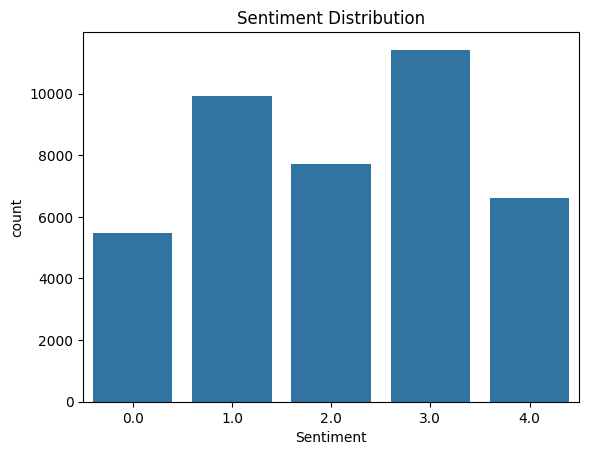

In [13]:
sns.countplot(x='Sentiment', data=corpus)
plt.title('Sentiment Distribution')
plt.show()

In [14]:
corpus['OriginalTweet'].sample(10).values

array(['#Consumer guide to helping #smallbusiness during #coronavirus https://t.co/oVDTi30FeJ via @TheHustle #Entrepreneurs #restaurants #CoronaVirusChallenge',
       '@AlticeUSA greets #COVID19 #pandemic by raising @Optimum subscribers prices by over $20.00! While other cos are sensitive to hardships of #Coronavirus on families, children &amp; workers both social &amp; economic Altice exploits the need 4 #phone, #inter',
       'Gotta have a sense of humor during these times. #flights #covid_19 #haha #prices https://t.co/fmBEu3ozwS',
       '@TerryWhittle4 @ButcherNate1 With the current difficulties in the supply chain due to labor issues, and precautions around Covid-19, most supermarket goods (meat, produce, etc.) can be expected to fluctuate in price.',
       'JUST Newsroom - COVID-19: Commissioner Reynders repeats his call for respect of consumer protection and support to travel and tourism businesses for package travel holidays - European Commission https://t.co/VfOLIUGQ1T',
  

### Cleaning words sentences using regular expression

In [15]:
def clean_tweet(tweet):
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    
    return tweet

corpus['OriginalTweet'] = corpus['OriginalTweet'].apply(clean_tweet)


C:\Users\tasnu\AppData\Local\Temp\ipykernel_1608\1898283594.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['OriginalTweet'] = corpus['OriginalTweet'].apply(clean_tweet)


In [16]:
corpus['OriginalTweet'].sample(10).values

array(['those sanitizers story came out I couldnt believe someone could be so greedy But thats exactly what the hell these companies are doing when it comes to selling their supplies I aint even mad at sanitizer guy anymore coronavirus CoronaVirusNYC pricegouging',
       'Covid milk supply under threat amid demand spike',
       'Coronavirus Effect in Delhi Vegetable prices witness a minimal hike during lockdown supply affected majorly',
       'Covid Just got back from a supermarket run Even with the per customer shelves are still empty Not through shortages but through Aholes hording more than they need Sadly in the store was us yos and older oaps ppl walking around with empty trolleys picking',
       'Me and Kev have Ordered soo much fresh fish and other foods from local businesses since lockdown rather than just having supermarket foods Will definitely be continuing this once its over Loving all the cooking and baking too supportlocalBusiness COVID',
       'What are emerging cro

### Removing Stopwords

In [17]:
corpus['OriginalTweet'] = corpus['OriginalTweet'].str.lower()

C:\Users\tasnu\AppData\Local\Temp\ipykernel_1608\892715711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['OriginalTweet'] = corpus['OriginalTweet'].str.lower()


In [18]:
nltk.download('stopwords')

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    new_text = []

    for word in words:
        if word not in stop_words:
            new_text.append(word)
    
    return ' '.join(new_text)

corpus['OriginalTweet'] = corpus['OriginalTweet'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tasnu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\tasnu\AppData\Local\Temp\ipykernel_1608\2800391941.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['OriginalTweet'] = corpus['OriginalTweet'].apply(remove_stop_words)


### WordCloud Visualization

In [19]:
def get_words(df, sentiment, n=10):
    sentiment_df = df[df['Sentiment'] == sentiment]

    all_words = []
    for tokens in sentiment_df['OriginalTweet']:
        for word in tokens.split():
            all_words.append(word)

    top_words = Counter(all_words).most_common(n)
    return dict(top_words)

positive_words = get_words(corpus, 3.0 , 10)
negative_words = get_words(corpus, 1.0, 10)
neutral_words = get_words(corpus, 2.0, 10)
extremely_positive_words = get_words(corpus, 4.0, 10)
extremely_negative_words = get_words(corpus, 0.0, 10)

print("Top 10 Extremely Positive Words:", extremely_positive_words)
print("Top 10 Positive Words:", positive_words)
print("Top 10 Neutral Words:", neutral_words)
print("Top 10 Negative Words:", negative_words)
print("Top 10 Extremely Negative Words:", extremely_negative_words)

Top 10 Extremely Positive Words: {'covid': 3450, 'coronavirus': 2661, 'store': 1260, 'amp': 1123, 'supermarket': 1084, 'grocery': 1072, 'food': 992, 'help': 977, 'hand': 939, 'prices': 936}
Top 10 Positive Words: {'covid': 6150, 'coronavirus': 4837, 'prices': 2025, 'store': 2023, 'grocery': 1930, 'supermarket': 1915, 'food': 1798, 'people': 1435, 'amp': 1421, 'consumer': 1300}
Top 10 Neutral Words: {'covid': 4181, 'coronavirus': 3805, 'supermarket': 1335, 'store': 1320, 'prices': 1229, 'grocery': 1182, 'consumer': 981, 'shopping': 756, 'online': 695, 'food': 675}
Top 10 Negative Words: {'covid': 5137, 'coronavirus': 4313, 'prices': 2370, 'food': 2021, 'supermarket': 1733, 'store': 1523, 'people': 1415, 'grocery': 1412, 'amp': 1078, 'consumer': 951}
Top 10 Extremely Negative Words: {'covid': 2874, 'coronavirus': 2404, 'food': 1567, 'prices': 1349, 'people': 1215, 'panic': 1141, 'supermarket': 932, 'crisis': 837, 'amp': 826, 'store': 663}


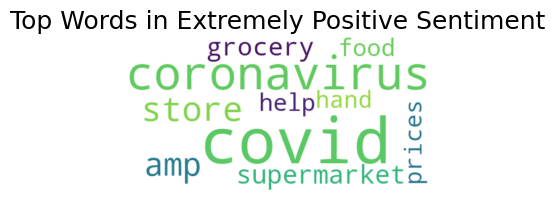

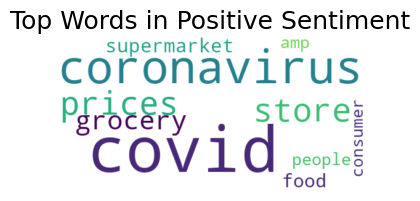

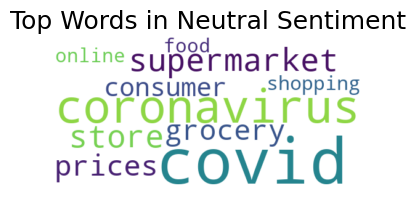

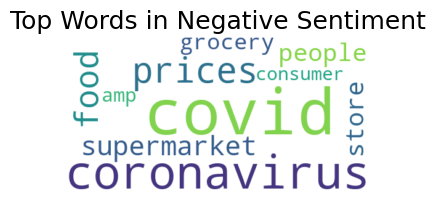

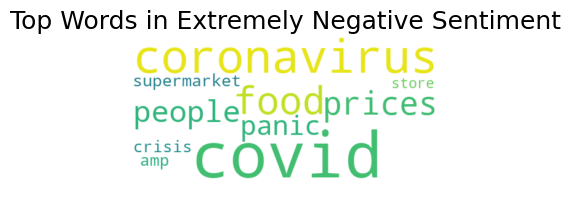

In [20]:
def plot_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=500, height=250, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(4, 2))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

plot_wordcloud(extremely_positive_words, 'Top Words in Extremely Positive Sentiment')
plot_wordcloud(positive_words, 'Top Words in Positive Sentiment')
plot_wordcloud(neutral_words, 'Top Words in Neutral Sentiment')
plot_wordcloud(negative_words, 'Top Words in Negative Sentiment')
plot_wordcloud(extremely_negative_words, 'Top Words in Extremely Negative Sentiment')

### Data spiliting

In [21]:
x = corpus['OriginalTweet']
y = corpus['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=40)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=40)

In [22]:
x_train

35460    australia export prices chickpeas faba beans l...
8258     response covid virus urt made decision tempora...
27105    oil gas jobs risk hurt demand russia saudi ara...
420      thread chinas role wildlife trade come greater...
7434     think adorable kidsactivities dfwparents paren...
                               ...                        
34197    provides help irishconsumers bought fights euu...
14873    florida panic mode trucks delivering job calm ...
19160    looks like changing prices brita jugs amp filt...
4177     global oilprices plunge yearlow per barrel ami...
32395    heartbreaking devastating covidwalkout covid c...
Name: OriginalTweet, Length: 33336, dtype: object

### Tokenization

In [23]:
nltk.download('punkt_tab')
x_train = x_train.apply(word_tokenize)
x_test = x_test.apply(word_tokenize)
x_cal = x_val.apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tasnu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [24]:
x_train

35460    [australia, export, prices, chickpeas, faba, b...
8258     [response, covid, virus, urt, made, decision, ...
27105    [oil, gas, jobs, risk, hurt, demand, russia, s...
420      [thread, chinas, role, wildlife, trade, come, ...
7434     [think, adorable, kidsactivities, dfwparents, ...
                               ...                        
34197    [provides, help, irishconsumers, bought, fight...
14873    [florida, panic, mode, trucks, delivering, job...
19160    [looks, like, changing, prices, brita, jugs, a...
4177     [global, oilprices, plunge, yearlow, per, barr...
32395    [heartbreaking, devastating, covidwalkout, cov...
Name: OriginalTweet, Length: 33336, dtype: object

### Data visualization

Maximum length of each instances: 40


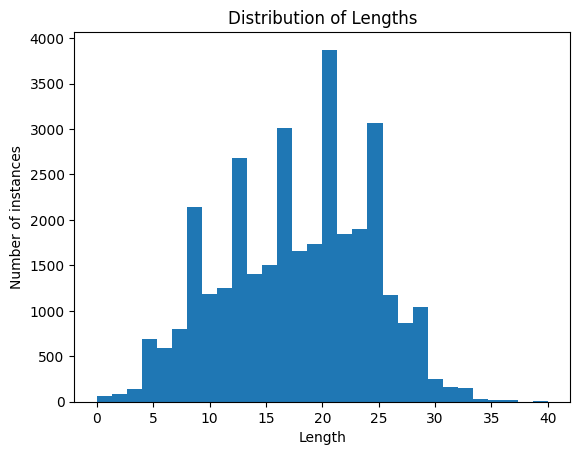

In [25]:
length = [len(token) for token in x_train]
print(f'Maximum length of each instances: {max(length)}')

plt.hist(length, bins=30)
plt.xlabel('Length')
plt.ylabel('Number of instances')
plt.title('Distribution of Lengths')
plt.show()

## Instruction to download GoogleNews word2vec pretrain weights

Kindly go through the following steps-

1. Download the [googlenews-vectors-negative300.bin.gz](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g)
2. Copy the file and paste it in the current working directory.


#### Word2Vec Pretrain Model

In [26]:
zip_path = 'GoogleNews-vectors-negative300.bin.gz'
word2vec_model = KeyedVectors.load_word2vec_format(zip_path, binary=True) 

#### Applying word2vec in sentence token [matrix_size = (token_number* 300)]

In [27]:
def vectorize_sentence(sentence, model):
    vectors = []
    for word in sentence:
        if word in model:
            vectors.append(model[word])
    return vectors

x_train = x_train.apply(lambda tokens: vectorize_sentence(tokens, word2vec_model))
x_test = x_test.apply(lambda tokens: vectorize_sentence(tokens, word2vec_model))
x_val= x_val.apply(lambda tokens: vectorize_sentence(tokens, word2vec_model))

In [28]:
# each vector size = len(x_train[index]) * 300

x_train[3]

[array([-0.18164062,  0.16503906, -0.16601562,  0.35742188, -0.09228516,
         0.20117188, -0.0546875 , -0.26171875, -0.17285156, -0.08056641,
         0.14648438, -0.24609375,  0.18652344,  0.10253906, -0.3203125 ,
         0.16699219, -0.0032196 , -0.06640625,  0.06591797, -0.109375  ,
         0.13964844, -0.05029297,  0.25390625,  0.0859375 ,  0.02026367,
         0.05517578, -0.08447266,  0.07324219,  0.15429688, -0.13867188,
        -0.25195312, -0.15136719,  0.07958984,  0.00848389, -0.24902344,
         0.05224609,  0.04394531, -0.19726562, -0.2109375 ,  0.01477051,
        -0.23632812, -0.14355469,  0.17773438,  0.26757812, -0.08789062,
        -0.07910156, -0.16113281,  0.23632812, -0.07177734,  0.08837891,
         0.07177734, -0.11962891, -0.09228516, -0.12060547, -0.00448608,
        -0.21875   , -0.05712891, -0.04418945,  0.07226562, -0.05883789,
        -0.12597656,  0.03125   , -0.24609375,  0.19140625,  0.14941406,
        -0.19335938, -0.1875    , -0.05126953,  0.0

In [29]:
def vector_lengths(data):
    vec_len = {}
    for vec in data:
        if len(vec) not in vec_len:
            vec_len[len(vec)] = 1
        else:
            vec_len[len(vec)] += 1

    return vec_len

In [30]:
print(f'Train: {vector_lengths(x_train)}')
print(f'Validation: {vector_lengths(x_val)}')
print(f'Test: {vector_lengths(x_test)}')

Train: {23: 1393, 12: 1499, 21: 1837, 24: 1180, 4: 531, 3: 293, 13: 1505, 7: 1075, 19: 1820, 18: 1757, 14: 1525, 27: 471, 9: 1393, 16: 1668, 15: 1567, 5: 715, 17: 1767, 10: 1437, 22: 1635, 6: 940, 20: 1875, 8: 1358, 11: 1461, 1: 49, 25: 946, 28: 292, 26: 708, 29: 210, 30: 108, 2: 138, 0: 41, 34: 13, 31: 56, 32: 47, 35: 6, 33: 15, 37: 1, 36: 4}
Validation: {127: 26, 136: 36, 143: 35, 115: 35, 149: 32, 67: 30, 50: 18, 139: 26, 59: 22, 77: 20, 165: 13, 134: 33, 157: 23, 142: 30, 114: 27, 110: 44, 119: 44, 69: 25, 147: 24, 51: 25, 54: 29, 97: 37, 137: 39, 2: 1, 62: 23, 64: 19, 124: 33, 117: 31, 19: 6, 102: 32, 88: 29, 148: 36, 76: 22, 128: 34, 48: 18, 140: 41, 56: 16, 130: 35, 156: 24, 73: 33, 92: 24, 100: 35, 98: 32, 135: 41, 93: 30, 103: 32, 111: 29, 133: 31, 33: 12, 96: 32, 65: 21, 132: 40, 38: 8, 91: 36, 81: 25, 164: 24, 79: 25, 150: 23, 106: 29, 99: 27, 95: 24, 70: 13, 105: 43, 129: 26, 74: 21, 35: 7, 125: 32, 153: 35, 113: 45, 55: 20, 94: 38, 120: 49, 123: 33, 20: 6, 43: 16, 86: 22, 

### Padding the sentences

In [31]:
train_max_len = max(vector_lengths(x_train))
val_max_len = max(vector_lengths(x_val))
test_max_len = max(vector_lengths(x_test))

def pad_sequence(sequence, max_len):
    if len(sequence) < max_len:
        padding = [np.zeros(300)] * (max_len - len(sequence))
        return sequence + padding
    
    return sequence

x_train = x_train.apply(lambda x: pad_sequence(x, train_max_len))
x_val = x_val.apply(lambda x: pad_sequence(x, val_max_len))
x_test = x_test.apply(lambda x: pad_sequence(x, test_max_len))

### Convert to Tensor (ML)

In [32]:
def vectorize_sentence_ml(sentence):
    vector = np.zeros(300)
    for part in sentence:
        vector += part
    
    return vector/len(sentence)

x_train_ml = x_train.apply(lambda token_vec: vectorize_sentence_ml(token_vec))
x_val_ml = x_val.apply(lambda token_vec: vectorize_sentence_ml(token_vec))
x_test_ml = x_test.apply(lambda token_vec: vectorize_sentence_ml(token_vec))

In [33]:
x_comb_ml = pd.concat([x_train_ml, x_val_ml])
x_comb_ml = pd.DataFrame(x_comb_ml.tolist())

y_comb_ml = pd.concat([y_train, y_val])
y_comb_ml = pd.DataFrame(y_comb_ml.tolist())

x_test_ml = pd.DataFrame(x_test_ml.tolist())
y_test_ml = pd.DataFrame(y_test.tolist())

In [34]:
x_comb_ml

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.012166,0.025754,-0.044318,0.086945,-0.003572,-0.009146,-0.003479,-0.078702,0.019361,0.079681,...,-0.045631,-0.033130,-0.046633,0.015672,0.086294,0.028822,0.016463,0.013259,0.083755,0.037489
1,0.000072,-0.015694,0.025268,0.014728,-0.020021,-0.002829,-0.019883,-0.021491,0.072239,0.002813,...,-0.023955,0.001212,0.001033,-0.010996,0.000211,0.022415,0.006199,0.014385,-0.001436,0.015393
2,0.008532,0.023232,-0.013442,0.064181,-0.046890,-0.003946,0.003640,-0.073331,0.016422,0.072497,...,-0.049154,0.012355,-0.027373,0.015889,-0.022225,0.034438,-0.017903,0.019272,0.033960,-0.016633
3,0.014637,0.052097,-0.018014,0.036227,-0.054731,-0.024044,0.000149,-0.040735,0.077221,0.053341,...,-0.037208,0.017707,-0.026221,0.048445,0.045551,0.024162,0.027964,-0.002206,0.116632,0.001953
4,-0.018883,0.001735,-0.012707,0.018370,-0.005351,-0.008555,0.020991,-0.006219,0.008682,0.019294,...,-0.004131,0.017222,0.006433,-0.000607,0.002204,0.010241,0.017895,0.002468,0.026050,0.015533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37036,-0.101280,0.057432,0.003315,0.079596,-0.034015,0.010324,-0.048496,-0.031139,-0.025591,0.006653,...,0.046263,-0.005515,-0.059056,0.047890,-0.019653,-0.097517,-0.057898,-0.012032,-0.055705,0.090969
37037,-0.128493,0.076037,-0.003756,0.092085,-0.035546,0.007863,-0.052552,-0.032502,-0.028774,0.005533,...,0.041454,-0.000235,-0.068549,0.050521,-0.026483,-0.110576,-0.067172,-0.020769,-0.059064,0.119724
37038,-0.055134,0.043554,-0.003893,0.049905,-0.019122,0.010068,-0.031799,-0.008525,-0.026649,0.009250,...,0.032595,-0.015624,-0.045137,0.033494,-0.006297,-0.057414,-0.040184,-0.005454,-0.039979,0.056329
37039,-0.089106,0.069955,-0.005896,0.077049,-0.024742,0.020108,-0.053969,-0.018009,-0.026625,0.011673,...,0.043380,-0.025187,-0.060336,0.050483,-0.007779,-0.080536,-0.040612,-0.012994,-0.062300,0.092120


In [35]:
print(x_comb_ml.shape)

(37041, 300)


### Convert to Tensor (DL)

In [36]:
print(x_train.dtypes)
print(y_train.dtypes)

object
float64


In [37]:
print(f'Train: {vector_lengths(x_train)}')
print(f'Validation: {vector_lengths(x_val)}')
print(f'Test: {vector_lengths(x_test)}')

Train: {37: 33336}
Validation: {211: 3705}
Test: {36: 4116}


In [38]:
x_train_tensor = torch.tensor(x_train.tolist(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.tolist(), dtype=torch.long)
x_val_tensor = torch.tensor(x_val.tolist(), dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.tolist(), dtype=torch.long)
x_test_tensor = torch.tensor(x_test.tolist(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.tolist(), dtype=torch.long)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

C:\Users\tasnu\AppData\Local\Temp\ipykernel_1608\2376048147.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  x_train_tensor = torch.tensor(x_train.tolist(), dtype=torch.float32)


In [39]:
print(x_train_tensor.size())
print(x_val_tensor.size())
print(x_test_tensor.size())

torch.Size([33336, 37, 300])
torch.Size([3705, 211, 300])
torch.Size([4116, 36, 300])


In [40]:
print(y_train_tensor.unique())
print(y_val_tensor.unique())
print(y_test_tensor.unique())

tensor([4, 0, 2,  ..., 3, 1, 0])
tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4])


### Random Forest

In [41]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=40)

rf_model.fit(x_comb_ml, y_comb_ml)
y_pred = rf_model.predict(x_test_ml)

C:\Users\tasnu\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


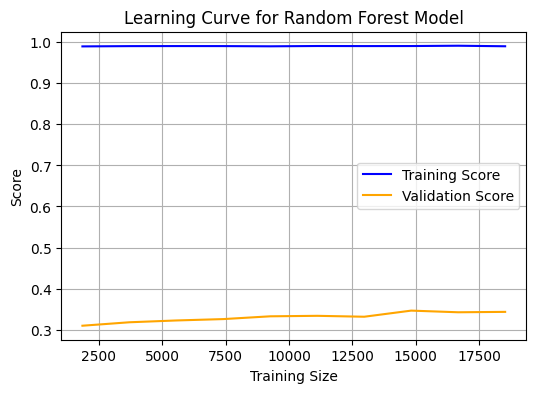

In [42]:
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, x_comb_ml, y_comb_ml, cv=2, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_mean, label="Validation Score", color="orange")
plt.title("Learning Curve for Random Forest Model")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

In [43]:
rf_test_accuracy = accuracy_score(y_test_ml, y_pred)
print(f"Random Forest Accuracy: {(rf_test_accuracy*100):.2f}%")

Random Forest Accuracy: 37.61%


In [44]:
rf_train_accuracy = max(train_mean)
rf_val_accuracy = max(test_mean)

### Function for training model, evaluating model and measuring accuracy

In [45]:
def calculate_accuracy(y_pred, y_true):
    y_pred_tag = torch.argmax(y_pred, dim=1)
    correct_results_sum = (y_pred_tag == y_true).sum().float()
    acc = correct_results_sum / y_true.shape[0]
    acc = torch.round(acc * 100)
    return acc

In [46]:
def train_model(model, optimizer, loss_function, train_loader, val_loader, num_epochs=15):
    train_losses = []
    val_losses = []

    train_accuracy = []
    val_accuracy = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        train_acc = 0

        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_acc += calculate_accuracy(outputs, batch_y)

        model.eval()
        val_loss = 0
        val_acc = 0

        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                val_outputs = model(batch_x)
                val_loss += loss_function(val_outputs, batch_y).item()
                val_acc += calculate_accuracy(val_outputs, batch_y)

        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        val_loss /= len(val_loader)
        val_acc /= len(val_loader)

        train_losses.append(train_loss)
        train_accuracy.append(train_acc)
        val_losses.append(val_loss)
        val_accuracy.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs}')
        print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%')
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%')

    return train_losses, val_losses, train_accuracy, val_accuracy

In [47]:
def evaluate_model(model, loss_function, test_loader):
    model.eval()
    test_loss = 0
    test_accuracy = 0

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            test_outputs = model(batch_x)
            test_loss += loss_function(test_outputs, batch_y).item()
            test_accuracy += calculate_accuracy(test_outputs, batch_y)

    test_loss /= len(test_loader)
    test_accuracy /= len(test_loader)

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

    return test_loss, test_accuracy

### RNN Model

In [48]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=0.1)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [49]:
input_size = 300
hidden_size = 64
output_size = 5
num_layers = 1
num_epochs = 40

model = RNNModel(input_size, hidden_size, output_size, num_layers)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

C:\Users\tasnu\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [50]:
rnn_train_losses, rnn_val_losses, rnn_train_accuracy, rnn_val_accuracy = train_model(
    model, optimizer, loss_function, train_loader, val_loader, num_epochs
)

Epoch 1/40
Train Loss: 1.5645, Train Accuracy: 28.28%
Validation Loss: 1.7413, Validation Accuracy: 17.74%
Epoch 2/40
Train Loss: 1.4396, Train Accuracy: 34.58%
Validation Loss: 2.1252, Validation Accuracy: 17.63%
Epoch 3/40
Train Loss: 1.3924, Train Accuracy: 36.89%
Validation Loss: 1.8794, Validation Accuracy: 24.21%
Epoch 4/40
Train Loss: 1.3780, Train Accuracy: 37.53%
Validation Loss: 2.3114, Validation Accuracy: 19.53%
Epoch 5/40
Train Loss: 1.3710, Train Accuracy: 38.10%
Validation Loss: 2.5659, Validation Accuracy: 18.07%
Epoch 6/40
Train Loss: 1.3698, Train Accuracy: 38.07%
Validation Loss: 2.3713, Validation Accuracy: 20.20%
Epoch 7/40
Train Loss: 1.3664, Train Accuracy: 38.29%
Validation Loss: 2.4236, Validation Accuracy: 20.64%
Epoch 8/40
Train Loss: 1.3643, Train Accuracy: 38.51%
Validation Loss: 2.6357, Validation Accuracy: 18.04%
Epoch 9/40
Train Loss: 1.3624, Train Accuracy: 38.78%
Validation Loss: 2.2081, Validation Accuracy: 23.06%
Epoch 10/40
Train Loss: 1.3595, Train

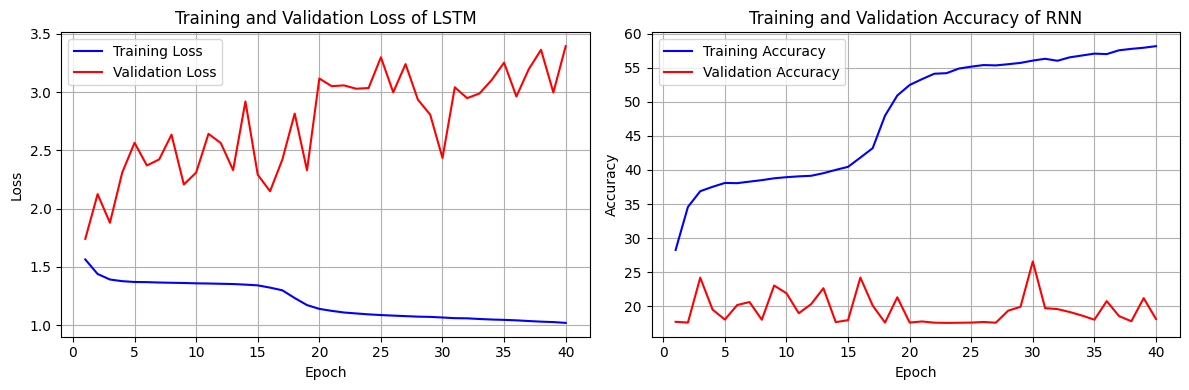

In [51]:
plt.figure(figsize=(12, 4)) 

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), rnn_train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), rnn_val_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of LSTM')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), rnn_train_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), rnn_val_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of RNN')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [52]:
rnn_test_loss, rnn_test_accuracy = evaluate_model(model, loss_function, test_loader)

Test Loss: 3.3955, Test Accuracy: 18.16%


In [53]:
rnn_train_accuracy, rnn_val_accuracy = max(rnn_train_accuracy), max(rnn_val_accuracy)

### LSTM Model

In [54]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout = 0.15)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

In [55]:
input_size = 300
hidden_size = 64
output_size = 5
num_layers = 1
num_epochs = 30

model = LSTMModel(input_size, hidden_size, output_size, num_layers)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

C:\Users\tasnu\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.15 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [56]:
lstm_train_losses, lstm_val_losses, lstm_train_accuracy, lstm_val_accuracy = train_model(
    model, optimizer, loss_function, train_loader, val_loader, num_epochs
)

Epoch 1/30
Train Loss: 1.5157, Train Accuracy: 30.70%
Validation Loss: 2.0592, Validation Accuracy: 16.66%
Epoch 2/30
Train Loss: 1.2881, Train Accuracy: 45.39%
Validation Loss: 2.3071, Validation Accuracy: 16.66%
Epoch 3/30
Train Loss: 1.1888, Train Accuracy: 50.38%
Validation Loss: 2.6750, Validation Accuracy: 16.66%
Epoch 4/30
Train Loss: 1.1340, Train Accuracy: 52.84%
Validation Loss: 2.9884, Validation Accuracy: 16.66%
Epoch 5/30
Train Loss: 1.0888, Train Accuracy: 55.03%
Validation Loss: 3.2738, Validation Accuracy: 16.61%
Epoch 6/30
Train Loss: 1.0529, Train Accuracy: 56.82%
Validation Loss: 3.4475, Validation Accuracy: 16.63%
Epoch 7/30
Train Loss: 1.0197, Train Accuracy: 58.44%
Validation Loss: 3.6560, Validation Accuracy: 16.63%
Epoch 8/30
Train Loss: 0.9907, Train Accuracy: 59.73%
Validation Loss: 3.8397, Validation Accuracy: 16.63%
Epoch 9/30
Train Loss: 0.9620, Train Accuracy: 61.21%
Validation Loss: 4.0001, Validation Accuracy: 16.66%
Epoch 10/30
Train Loss: 0.9342, Train

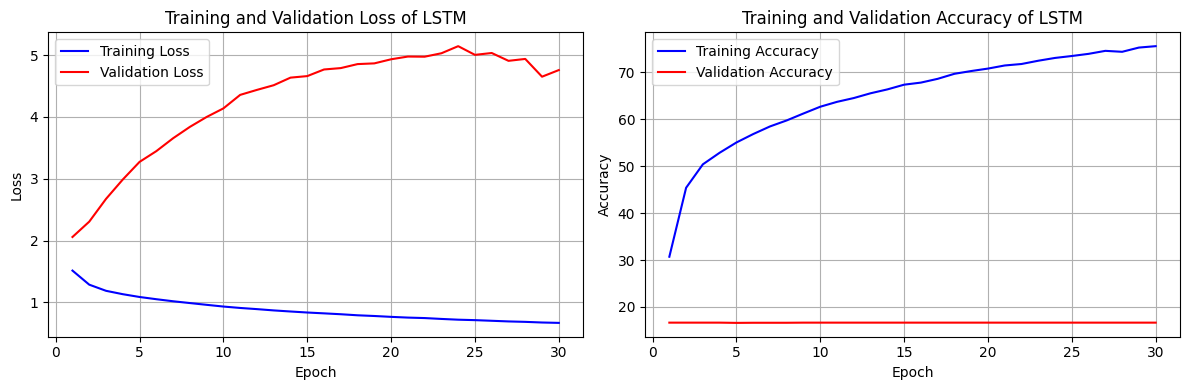

In [57]:
plt.figure(figsize=(12, 4)) 

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), lstm_train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), lstm_val_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of LSTM')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), lstm_train_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), lstm_val_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of LSTM')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [58]:
lstm_test_loss, lstm_test_accuracy = evaluate_model(model, loss_function, test_loader)

Test Loss: 4.7586, Test Accuracy: 16.66%


In [59]:
lstm_train_accuracy, lstm_val_accuracy = max(lstm_train_accuracy), max(lstm_val_accuracy)

### GRU Model

In [60]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=0.15)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

In [61]:
input_size = 300
hidden_size = 64
output_size = 5
num_layers = 1
num_epochs = 25

model = GRUModel(input_size, hidden_size, output_size, num_layers)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [62]:
gru_train_losses, gru_val_losses, gru_train_accuracy, gru_val_accuracy = train_model(
    model, optimizer, loss_function, train_loader, val_loader, num_epochs
)

Epoch 1/25
Train Loss: 1.5184, Train Accuracy: 30.55%
Validation Loss: 2.2630, Validation Accuracy: 17.63%
Epoch 2/25
Train Loss: 1.3729, Train Accuracy: 37.47%
Validation Loss: 2.8942, Validation Accuracy: 17.78%
Epoch 3/25
Train Loss: 1.3410, Train Accuracy: 38.97%
Validation Loss: 3.0756, Validation Accuracy: 18.63%
Epoch 4/25
Train Loss: 1.3233, Train Accuracy: 40.38%
Validation Loss: 3.3501, Validation Accuracy: 17.63%
Epoch 5/25
Train Loss: 1.2988, Train Accuracy: 42.37%
Validation Loss: 3.1802, Validation Accuracy: 18.60%
Epoch 6/25
Train Loss: 1.2499, Train Accuracy: 45.02%
Validation Loss: 2.8262, Validation Accuracy: 19.66%
Epoch 7/25
Train Loss: 1.1756, Train Accuracy: 49.92%
Validation Loss: 2.7891, Validation Accuracy: 17.63%
Epoch 8/25
Train Loss: 1.0922, Train Accuracy: 55.09%
Validation Loss: 2.9553, Validation Accuracy: 18.23%
Epoch 9/25
Train Loss: 1.0233, Train Accuracy: 58.00%
Validation Loss: 3.2545, Validation Accuracy: 18.16%
Epoch 10/25
Train Loss: 0.9784, Train

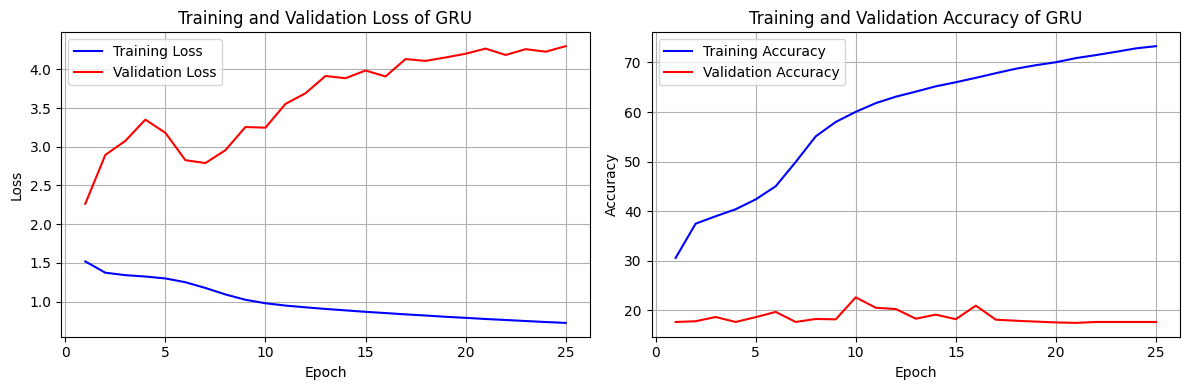

In [63]:
plt.figure(figsize=(12, 4)) 

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), gru_train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), gru_val_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of GRU')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), gru_train_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), gru_val_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of GRU')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [64]:
gru_test_loss, gru_test_accuracy = evaluate_model(model, loss_function, test_loader)

Test Loss: 4.2989, Test Accuracy: 17.63%


In [65]:
gru_train_accuracy, gru_val_accuracy = max(gru_train_accuracy), max(gru_val_accuracy)

### Comapre the models

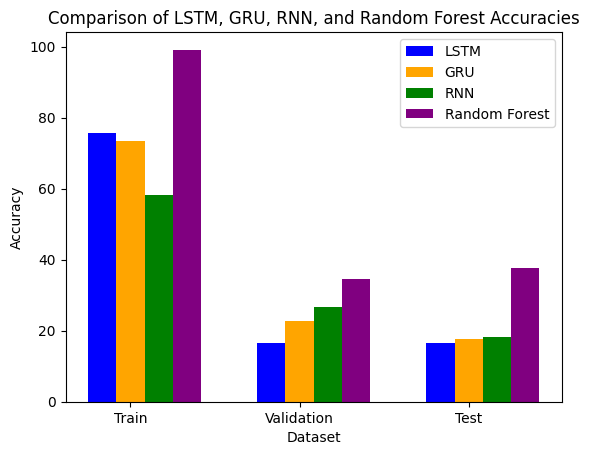

In [69]:
labels = ['Train', 'Validation', 'Test']
lstm_accuracies = [lstm_train_accuracy, lstm_val_accuracy, lstm_test_accuracy]
gru_accuracies = [gru_train_accuracy, gru_val_accuracy, gru_test_accuracy]
rnn_accuracies = [rnn_train_accuracy, rnn_val_accuracy, rnn_test_accuracy]
rf_accuracies = [rf_train_accuracy * 100, rf_val_accuracy * 100, rf_test_accuracy * 100]

bar_width = 0.2
index = np.arange(len(labels)) * 1.2

plt.bar(index, lstm_accuracies, bar_width, label='LSTM', color='blue')
plt.bar(index + bar_width, gru_accuracies, bar_width, label='GRU', color='orange')
plt.bar(index + 2 * bar_width, rnn_accuracies, bar_width, label='RNN', color='green')
plt.bar(index + 3 * bar_width, rf_accuracies, bar_width, label='Random Forest', color='purple')

plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of LSTM, GRU, RNN, and Random Forest Accuracies')
plt.xticks(index + bar_width, labels)

plt.legend()
plt.show()
